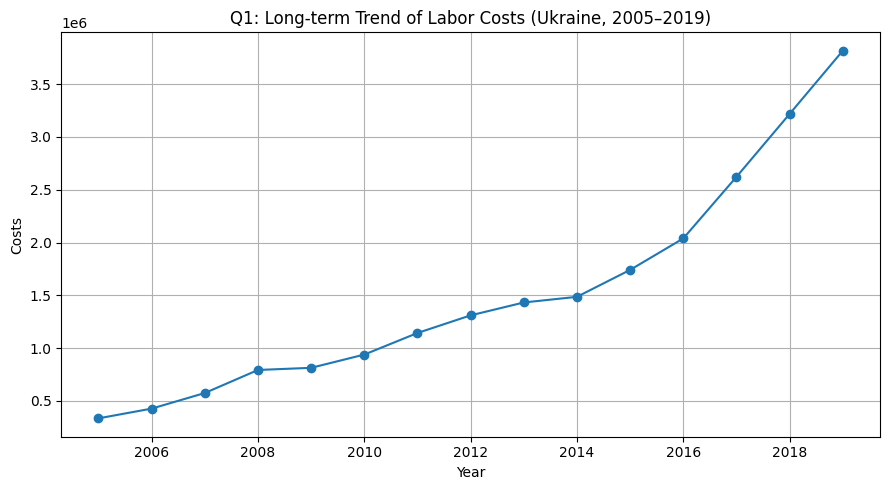

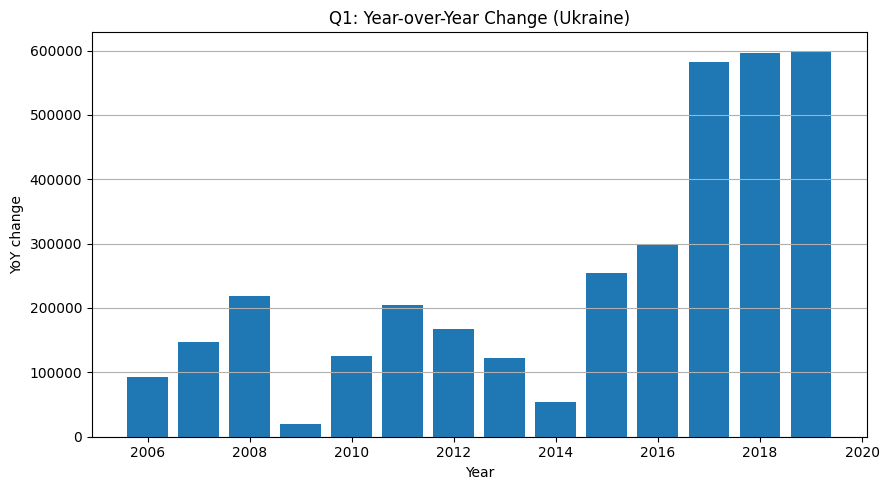

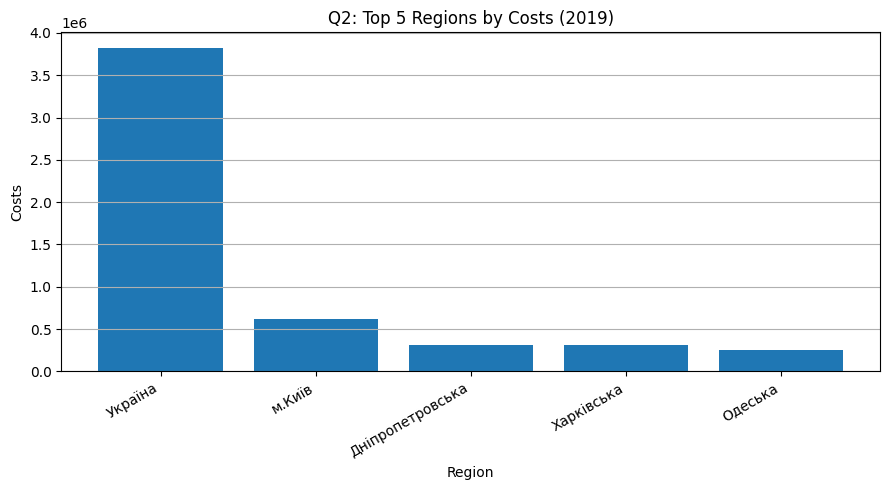

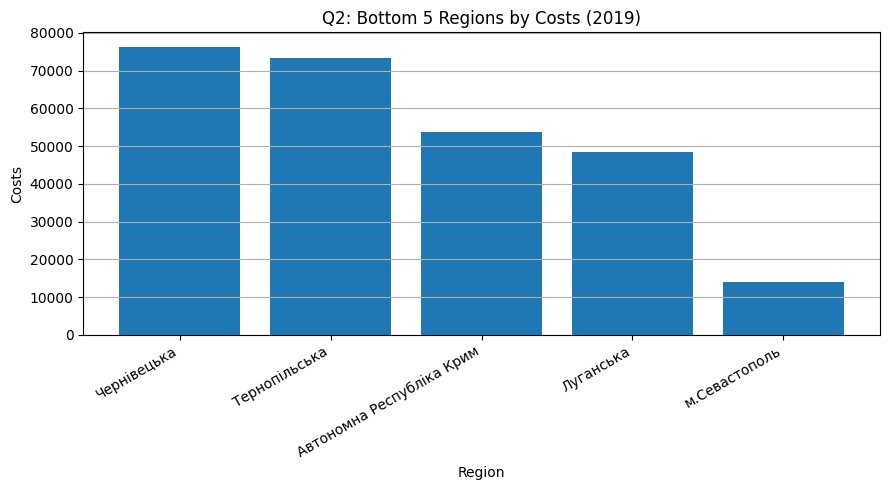

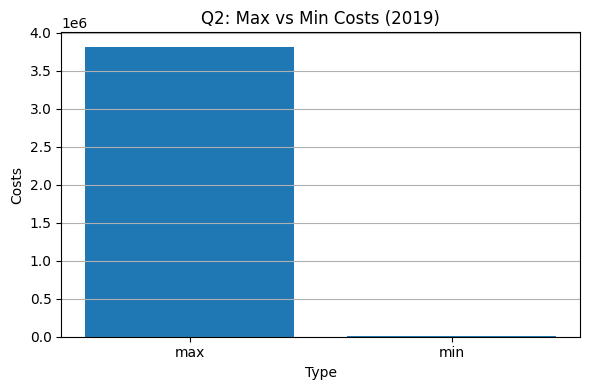

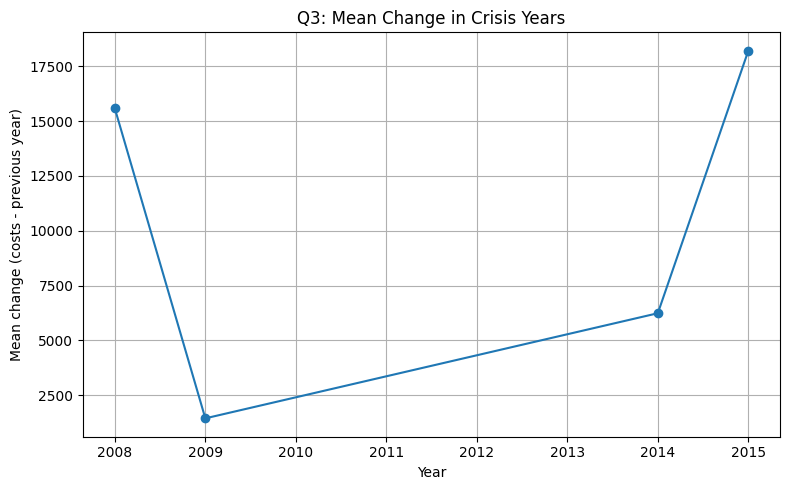

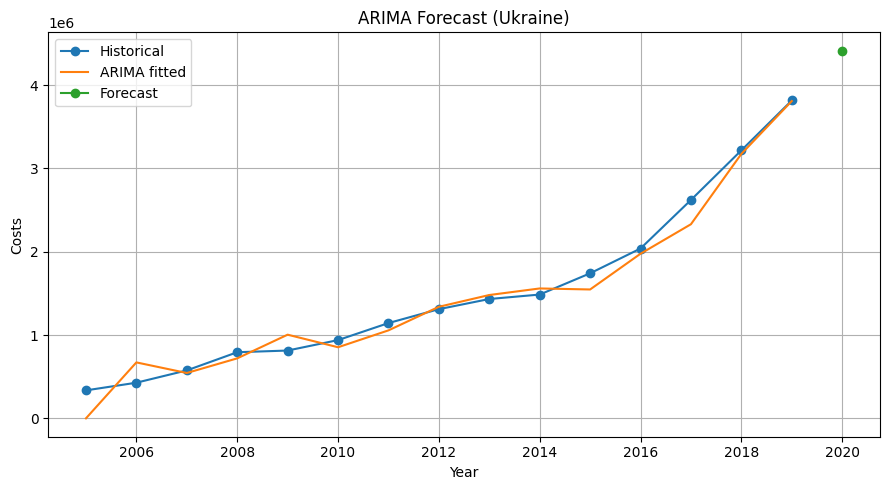

✅ Графіки показано та збережено у reports/figures/


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

TABLES_DIR = "../data/research-tables"
FIG_DIR = "../reports/figures"
os.makedirs(FIG_DIR, exist_ok=True)

# -------------------------
# Q1: Ukraine long-term trend
# -------------------------
q1 = pd.read_csv(f"{TABLES_DIR}/q1_ukraine_trend.csv")

plt.figure(figsize=(9, 5))
plt.plot(q1["year"], q1["costs"], marker="o")
plt.title("Q1: Long-term Trend of Labor Costs (Ukraine, 2005–2019)")
plt.xlabel("Year")
plt.ylabel("Costs")
plt.grid(True)
plt.tight_layout()
plt.savefig(f"{FIG_DIR}/q1_ukraine_trend.png", dpi=200)
plt.show()

# YoY change (optional, if exists)
if "yoy_change" in q1.columns:
    plt.figure(figsize=(9, 5))
    plt.bar(q1["year"], q1["yoy_change"])
    plt.title("Q1: Year-over-Year Change (Ukraine)")
    plt.xlabel("Year")
    plt.ylabel("YoY change")
    plt.grid(True, axis="y")
    plt.tight_layout()
    plt.savefig(f"{FIG_DIR}/q1_ukraine_yoy_change.png", dpi=200)
    plt.show()

# -------------------------
# Q2: Top & Bottom 5 regions (latest year)
# -------------------------
top5 = pd.read_csv(f"{TABLES_DIR}/q2_top5_latest_year.csv")
bottom5 = pd.read_csv(f"{TABLES_DIR}/q2_bottom5_latest_year.csv")

year_top = int(top5["year"].iloc[0]) if "year" in top5.columns else "latest"

plt.figure(figsize=(9, 5))
plt.bar(top5["region"], top5["costs"])
plt.title(f"Q2: Top 5 Regions by Costs ({year_top})")
plt.xlabel("Region")
plt.ylabel("Costs")
plt.xticks(rotation=30, ha="right")
plt.grid(True, axis="y")
plt.tight_layout()
plt.savefig(f"{FIG_DIR}/q2_top5_regions.png", dpi=200)
plt.show()

year_bottom = int(bottom5["year"].iloc[0]) if "year" in bottom5.columns else "latest"

plt.figure(figsize=(9, 5))
plt.bar(bottom5["region"], bottom5["costs"])
plt.title(f"Q2: Bottom 5 Regions by Costs ({year_bottom})")
plt.xlabel("Region")
plt.ylabel("Costs")
plt.xticks(rotation=30, ha="right")
plt.grid(True, axis="y")
plt.tight_layout()
plt.savefig(f"{FIG_DIR}/q2_bottom5_regions.png", dpi=200)
plt.show()

# Extremes max/min (optional)
extremes_path = f"{TABLES_DIR}/q2_extremes_latest_year.csv"
if os.path.exists(extremes_path):
    ext = pd.read_csv(extremes_path)
    year_ext = int(ext["year"].iloc[0]) if "year" in ext.columns else "latest"

    plt.figure(figsize=(6, 4))
    plt.bar(ext["type"], ext["costs"])
    plt.title(f"Q2: Max vs Min Costs ({year_ext})")
    plt.xlabel("Type")
    plt.ylabel("Costs")
    plt.grid(True, axis="y")
    plt.tight_layout()
    plt.savefig(f"{FIG_DIR}/q2_extremes_max_min.png", dpi=200)
    plt.show()

# -------------------------
# Q3: Crisis years effect (mean change)
# -------------------------
q3 = pd.read_csv(f"{TABLES_DIR}/q3_crisis_mean_change.csv")

# expected columns: year, change
# if not, fallback to second column
if "change" in q3.columns:
    y = q3["change"]
    y_label = "Mean change (costs - previous year)"
    title = "Q3: Mean Change in Crisis Years"
    filename = "q3_crisis_mean_change.png"
else:
    y = q3.iloc[:, 1]
    y_label = q3.columns[1]
    title = "Q3: Crisis Years Metric"
    filename = "q3_crisis_metric.png"

plt.figure(figsize=(8, 5))
plt.plot(q3["year"], y, marker="o")
plt.title(title)
plt.xlabel("Year")
plt.ylabel(y_label)
plt.grid(True)
plt.tight_layout()
plt.savefig(f"{FIG_DIR}/{filename}", dpi=200)
plt.show()

# -------------------------
# ARIMA: Historical + Fitted + Forecast
# -------------------------
hist = pd.read_csv(f"{TABLES_DIR}/q1_ukraine_trend.csv").sort_values("year")

plt.figure(figsize=(9, 5))
plt.plot(hist["year"], hist["costs"], marker="o", label="Historical")

fitted_path = f"{TABLES_DIR}/arima_ukraine_fitted.csv"
if os.path.exists(fitted_path):
    fitted = pd.read_csv(fitted_path).sort_values("year")
    plt.plot(fitted["year"], fitted["fitted_costs"], label="ARIMA fitted")

forecast_path = f"{TABLES_DIR}/arima_ukraine_forecast.csv"
if os.path.exists(forecast_path):
    fc = pd.read_csv(forecast_path).sort_values("year")
    plt.plot(fc["year"], fc["forecast_costs"], marker="o", label="Forecast")

plt.title("ARIMA Forecast (Ukraine)")
plt.xlabel("Year")
plt.ylabel("Costs")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig(f"{FIG_DIR}/arima_ukraine_forecast.png", dpi=200)
plt.show()

print("✅ Графіки показано та збережено у reports/figures/")